# M-files

So far, we have executed the commands in the command window of the graphical user interface or in one cell after the other in a Jupyter notebook. For a longer sequence of commands, a more practical way is to create an M-file using the M-file editor. Alternatively, if you have not installed GNU Octave on your local computer yet (see [Installing and running Octave](octave_installing_and_running.ipynb)), you can also use [Octave Online](https://octave-online.net).

In short:
- An M-file is a text file that consists of a sequence of MATLAB/Octave commands.
- MATLAB/Octave executes the commands in an M-file exactly as if they were entered in the MATLAB/Octave command window.

In the following, we will create, edit and run an M-file script in GNU Octave.

## Creating an M-file
To create a new M-file script or function, click on the icon in the upper left corner of the Octave GUI:
<img src="octave_screenshot_gui_new_script.png"/>

## Editing an M-file
In the M-file editor, you can enter a sqeuence of MATLAB/Octave commands line by line. The MATLAB/Octave syntax is highlighted. Comment lines that explain the code start with a `%` sign. As an example, you can either run the following piece of code that simply plots the sine curve in this notebook, or you can copy and paste it to the M-file editor, save it as an M-file callled `plot_sine.m` and run it from the M-file editor or the command window (see below).

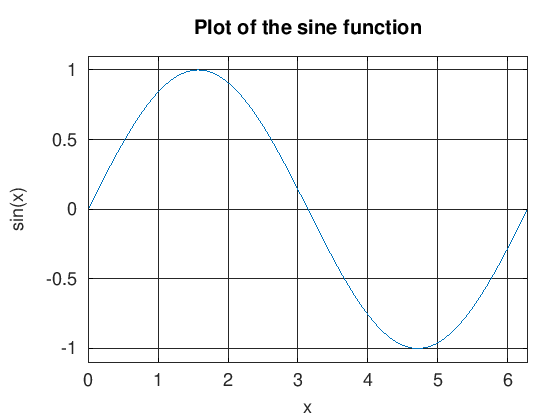

In [1]:
% PLOT_SINE Plot the sine curve.
% Cf. Spencer and Ware (2019), Chapter 15, Publication Quality Plots

% Create the data to plot
x = 0:pi/100:2*pi; % define vector of x-values
y = sin(x);        % calculate vector of y-values

% Make the plot
plot(x, y)

% Display axes grid lines
grid on

% Set the plot limits
axis([0 2*pi -1.1 1.1])

% Set the font size of the tick labels of the current axes
% ("gca" returns the handle to the current axes for the current figure)
set(gca, 'FontSize', 18)

% Make the labels
xlabel('x', 'FontSize', 18)
ylabel('sin(x)', 'FontSize', 18)
title('Plot of the sine function', 'FontSize', 20)

## The M-file editor

<img src="octave_screenshot_gui_editor.png"/>

## Running an M-file
There are two ways to now run the M-file script:
- You can either click on the button with the arrow `Save File and Run`in the M-file editor (see above) or
- change to the command window, type the name of the M-file script (but without extension `.m`) at the command line and press the enter key (see below).

<img src="octave_screenshot_gui_run_command_window.png"/>

# Solar heating model

## Fundamental equation
As a more complex example, consider a simple model for the solar heating of a water planet:

`new temperature = old temperature + temperature change`

The temperature change is given by the average flux of solar energy, divided by the heat capacity of the water planet, times the duration of heating:

`temperature change = average flux of solar energy / heat capacity x duration`

The solar energy flux is given by the total solar irradiance (TSI, the irradiance of the solar emission at the mean distance of the Earth from the Sun, Hartmann, 2016, p. 29) times the shadow area of Earth (see Figure 2.2 in Hartmann, 2016).
- The shadow area is the area that the planet sweeps out of the beam of parallel energy flux. It is equal to $\pi\,r_{\rm p}^2$, where $r_{\rm p}$ is the radius of the solid planet.
- The TSI is also called the *solar constant* $S_0$. The best and most recent estimate of the TSI is $S_0 = (1360.8 \pm 0.5)\;{\rm W}\,{\rm m}^{−2}$.

Since the area presented to the incoming solar radiation by the rotating Earth (over any period longer than a day) is $4\,\pi\,r_{\rm p}^2$, the average flux of solar energy is
$ \begin{equation}
  \frac{S_0\,\pi\,r_{\rm p}^2}{4\,\pi\,r_{\rm p}^2} = \frac{S_0}{4}\;.
\end{equation}$

We choose a a value for the effective heat capacity $\overline{C}_{\rm ao} = 2.9526\times10^8\;{\rm J}\,{\rm m}^2\,{\rm K}^{-1}$ (Hartmann, 1994) that corresponds to the ocean mixed layer, which is the upper 50 m to 70 m of the ocean that is in direct contact with the atmosphere through the ocean surface.

Finally, in the context of numerically solving the underlying ordinary differential equation, the duration of heating is called the *time step*, and it is denoted by $\Delta t$.

In summary, the temperature change can be calculated according to:

`temperature change` = $\frac{1}{\overline{C}_{\rm ao}}\frac{S_0}{4}\times\Delta t\;.$

The new temperature can now be calculated from the old temperature as follows:

$T_{\rm new} = T_{\rm old} + \frac{1}{\overline{C}_{\rm ao}}\frac{S_0}{4}\times\Delta t\;.$

## Numerical solution by iteration
To approximate the time-dependent evolution of temperature, we use the Euler method and iterate:

<img src="figure_euler_method.png"/>

## `for` loop
In MATLAB/Octave, such an iteration can be expressed in a compact way as a `for` loop:

for *index* = *values*
> *group of statements*

end

A `for` loop executes a group of statements repeatedly for a specified number of times. For example, to record the elapsed time in a numerical simulation:

In [4]:
deltaT = 86400.0; % time step/s
nTimeSteps = 365; % number of time steps

myTime = 0.0;
for myIter=1:nTimeSteps
    myTime = myTime + deltaT;
    % disp(myTime)
end

Try activating the command disp(myTime) by removing the % sign, and you will see how myTime is incremented by deltaT each time the body of the loop is executed.

## Version 1 of the solar heating model
Now that you know how to express an iteration using the MATLAB/Octave *for loop* construct, you have all means to solve Exercise 2, implement version 1 of the solar heating model in an M-file script named `solar_heating1.m` and answer the following questions:
- What is the modeled temperature after one year?
- How long does it take to reach the boiling point?
- How would the temperature change proceed if time goes on? Does this make sense?

To answer these questions, let us implement the solar heating model line by line. You should first try yourself. Then you can compare your M-file script to the following code segments in the notebook.

### 1. Physical constants, run parameters and model parameters
We start by setting physical constants, run parameters that control the model simulation and model parameters that determine the characteristics of the model:

In [5]:
% Set physical constants
pureWaterFreezingPoint  = 273.15;  % pure water freezing point/K

% Set run parameters
deltaT     =    86400.0;           % time step/s
startTime  =    0.0;               % time to start integration/s
nTimeSteps =  365;                 % total number of time steps

% Set model parameters
solarConstant         = 1360.8;    % solar constant/(W m-2)
effectiveHeatCapacity = 2.9526E08; % effective heat capacity of the 
                                   % atmosphere-ocean system/(J m-2 K-1)

### 2. Initial conditions
Next we specify the initial temperature and initial time:

In [8]:
% Set initial conditions
temperature = 15.0 + pureWaterFreezingPoint;
myTime      = startTime;

### 3. Time loop
Finally, we add the time loop in terms of a `for` loop. It keeps track of the simulated time and approximates the time-dependent evolution of temperature using the Euler method:

In [9]:
% Time loop (myIter = iteration counter)
for myIter=1:nTimeSteps
    
    % Record simulated time
    myTime = myTime + deltaT;
    
    % Step global annual-mean surface temperature forward in time 
    % (by "Euler forward" or "forward-in-time" method)
    temperature  = temperature + deltaT/effectiveHeatCapacity* ...
                                 (solarConstant/4.0);

end % end of time loop

Note that we need only one temperature variable, which is assigned a new value every time the body of the `for` loop is executed. After the last time step, this variable contains the final temperature value:

In [10]:
temperature

temperature =  324.49


Hence the temperature after one year is 324.49 K. To find out how long it takes to reach the boiling point or how the temperature change would proceed if time went on, you could simply reduce or increase the number of time steps `nTimeSteps` and rerun your M-file script `solar_heating1.m`, or alternatively, rerun the cells in this notebook. 

## Summary
M-files can be used to carry out complex tasks in a concise manner, much simpler than in a spreadsheet.